# title

In [1]:
import pandas as pd

df = pd.read_csv('tri_health_data.csv')
df.head(5)

,Date,Sleep,Activity Type,Activity Duration,TSS,Weight,HRV,Steps,Cals_burnt,Cals,Carbs,Fats,Protein,Sensation
0,22/05/2017,7.1,"Swim, Run",125.0,154,87.7,NaN,13894.0,4600.0,3600.0,481.0,102.0,135.0,7.0
1,23/05/2017,6.3,Swim,45.0,78,NaN,NaN,12739.0,3459.0,3700.0,413.0,100.0,75.0,4.0
2,24/05/2017,6.7,NaN,NaN,0,NaN,NaN,3324.0,2629.0,2210.0,305.0,42.0,75.0,8.0
3,25/05/2017,7.6,"Swim, Gym",142.0,155,NaN,NaN,11532.0,4327.0,4580.0,392.0,89.0,175.0,7.0
4,26/05/2017,8.7,Run,68.0,60,NaN,NaN,10479.0,3363.0,3590.0,510.0,61.0,80.0,9.0


In [2]:
# 1. Drop the columns 'Fats', 'Carbs', and 'HRV'.
df.drop(columns=['Fats', 'Carbs', 'HRV'], inplace=True)

# 2. Forward-fill the missing values in the 'Weight' column.
df['Weight'].fillna(method='ffill', inplace=True)

# 3. Fill the missing values in the 'Protein' column with its median, or with 80 if the median is NaN.
protein_median = df['Protein'].median()
if pd.isna(protein_median):
    df['Protein'].fillna(value=80, inplace=True)
else:
    df['Protein'].fillna(value=protein_median, inplace=True)

# 4. Fill any missing values in the 'Cals' column with its 75th percentile value.
df['Cals'].fillna(value=df['Cals'].quantile(0.75), inplace=True)

# 5. Fill any missing values in the 'Sensation' column with its mean value.
df['Sensation'].fillna(value=df['Sensation'].mean(), inplace=True)

# 6. Identify and drop rows where 'Activity Duration' is NaN but 'Activity Type' is not NaN.
rows_to_drop = df[df['Activity Duration'].isna() & ~df['Activity Type'].isna()].index
rows_dropped_count = len(rows_to_drop)
df.drop(rows_to_drop, inplace=True)

# 7. change NaN to value 0
df['Activity Duration'].fillna(value=0, inplace=True)

df['Activity Type'].fillna(value='Rest_Day', inplace=True)


rows_dropped_count

2

In [56]:
df.head(5)
#explain the zero value and why it is zero!!!!!

,Date,Sleep,Activity Type,Activity Duration,TSS,Weight,Steps,Cals_burnt,Cals,Protein,Sensation
0,22/05/2017,7.1,"Swim, Run",125.0,154,87.7,13894.0,4600.0,3600.0,135.0,7.0
1,23/05/2017,6.3,Swim,45.0,78,87.7,12739.0,3459.0,3700.0,75.0,4.0
2,24/05/2017,6.7,Rest_Day,0.0,0,87.7,3324.0,2629.0,2210.0,75.0,8.0
3,25/05/2017,7.6,"Swim, Gym",142.0,155,87.7,11532.0,4327.0,4580.0,175.0,7.0
4,26/05/2017,8.7,Run,68.0,60,87.7,10479.0,3363.0,3590.0,80.0,9.0


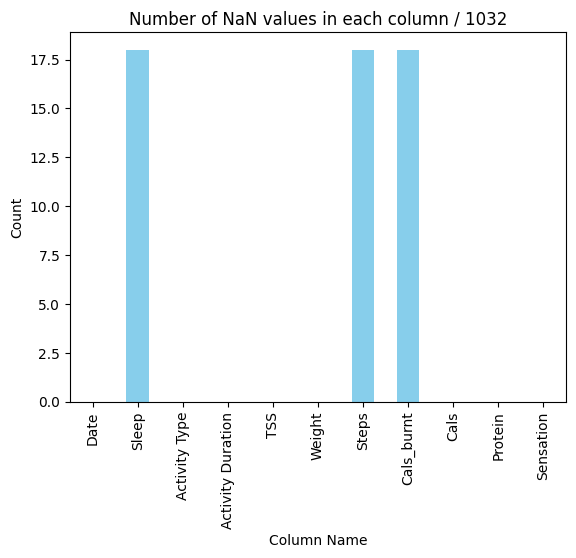

In [3]:
import matplotlib.pyplot as plt
nan_counts = df.isna().sum()
count_date = df['Date'].count()

# Plotting the NaN counts
nan_counts.plot(kind='bar', color='skyblue')
plt.title(f'Number of NaN values in each column / {count_date}')
plt.ylabel('Count')
plt.xlabel('Column Name')
plt.show()

In [4]:
df = df.dropna(subset=['Sleep', 'Steps', 'Cals_burnt'])

In [5]:
df.dtypes


Date                  object
Sleep                float64
Activity Type         object
Activity Duration    float64
TSS                    int64
Weight               float64
Steps                float64
Cals_burnt           float64
Cals                 float64
Protein              float64
Sensation            float64
dtype: object

## Train Test Split

In [ ]:
# stratify - inlcude if data is none then in a stratify = y. 

In [6]:
from sklearn.model_selection import train_test_split

# Splitting the data into features and target
X = df.drop(columns=['Cals', 'Date'])  # Removing 'Date' and target column 'Cals'
y = df['Cals']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



In [7]:
X_train

,Sleep,Activity Type,Activity Duration,TSS,Weight,Steps,Cals_burnt,Protein,Sensation
168,8.2,"Swim, Gym",60.0,65,87.0,11298.0,3519.0,80.0,7.0
120,6.9,"Swim, Run",60.0,65,86.7,12700.0,3462.0,80.0,4.0
614,6.0,Bike,175.0,134,90.2,6178.0,4769.0,165.0,3.0
967,7.2,Swim,60.0,66,90.7,12701.0,3522.0,80.0,7.0
997,6.9,Swim,60.0,54,90.8,12351.0,3351.0,80.0,8.0
...,...,...,...,...,...,...,...,...,...
500,7.1,"Swim, Run, Gym",60.0,67,85.4,12642.0,3489.0,75.0,6.0
82,6.5,"Run, Bike",87.0,62,85.4,4483.0,2148.0,80.0,4.0
93,7.9,Run,30.0,99,85.4,8950.0,3243.0,110.0,8.0
941,8.9,Swim,60.0,65,89.2,11653.0,3609.0,80.0,10.0


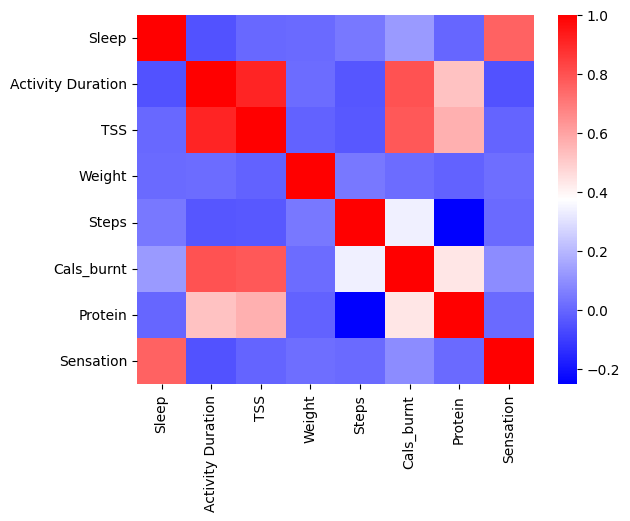

In [8]:
import seaborn as sns

# Heatmap of pairwise correlations pearson!! spiersman
correlation_matrix = X_train.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
 

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()



# Creating transformers
transformers = [
    ('robust', RobustScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown="ignore"), categorical_cols)
]

# Building the column transformer
preprocessor = ColumnTransformer(transformers)



X_train_processed = pd.DataFrame(preprocessor.fit_transform(X_train))



In [10]:
#preprocessor.get_feature_names_out()

In [11]:
#pd.DataFrame(
    X_train_processed, 
    columns=preprocessor.get_feature_names_out()
)

IndentationError: unexpected indent (1499718019.py, line 2)

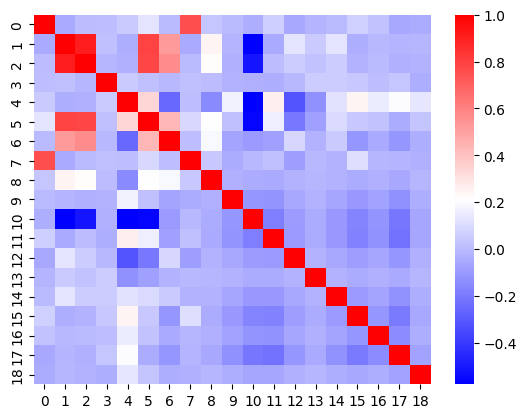

In [12]:
import seaborn as sns

# Heatmap of pairwise correlations
correlation_matrix = X_train_processed.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [13]:
import numpy as np

# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]


# Computing the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

# Showing the top 5 most correlated pairs of feature
corr_df.sort_values(by="absolute_correlation", ascending=False)

# keep all above 0.1 !

,feature_1,feature_2,correlation,absolute_correlation
21,1,2,0.908208,0.908208
39,2,1,0.908208,0.908208
24,1,5,0.796177,0.796177
96,5,1,0.796177,0.796177
43,2,5,0.781466,0.781466
...,...,...,...,...
38,2,0,0.003134,0.003134
306,16,2,-0.002658,0.002658
54,2,16,-0.002658,0.002658
114,6,0,-0.001873,0.001873


In [14]:
y_train.shape, X_train_processed.shape

#assert function if assert is true then through msg error is not , binary to chose

((709,), (709, 19))

In [57]:
# [13:21] Garo Panikian
# count=0

# try:
#     assert((train_texts.shape[0] + eval_labels.shape[0])==length_Data)
#     count+=1
#     assert(train_texts.dtype==eval_texts.dtype==texts_X.dtype)
#     count+=1
#     assert(train_labels.dtype==eval_labels.dtype==labels_Y.dtype)
#     count+=1

# except:
#     if count == 0:
#         print("The sum of length of training and evaluation sets should be equal to total data set size!")
#     elif count==1:
#         print("mismatch in data types amongst the search data split..." )
#     else:
#         print("mismatch in data types amongst the labels data split..." )

# if (count==3):
#       print("\033[92m All tests passed")

In [15]:
from sklearn.linear_model import LinearRegression


# Preprocess the test data
X_test_processed = preprocessor.transform(X_test)




# Instantiate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train_processed, y_train)

# Score the model on the Test data
#model.score(X_test,y_test)
# Score the model on the preprocessed test data
model.score(X_test_processed, y_test)

0.6665983906682841

In [16]:
from sklearn.model_selection import cross_validate
# 5-Fold Cross validate model
model = LinearRegression()
cv_results_train = cross_validate(model, X_train_processed, y_train, cv=5, 
                            scoring=['max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )
print(pd.DataFrame(cv_results_train)) 
print(cv_results_train['test_r2'].mean())

,fit_time,score_time,test_max_error,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.006874,0.001928,-1768.214909,0.721214,-337.635723,-190756.130894
1,0.002926,0.001444,-1770.716183,0.645169,-341.615480,-209795.051992
2,0.002324,0.000985,-1669.460559,0.738041,-313.991589,-172265.084201
3,0.001868,0.001099,-1840.301647,0.767413,-285.897990,-160305.998457
4,0.001585,0.001048,-2465.456267,0.707683,-335.960125,-244392.702945


In [47]:
cv_results_train['test_r2'].mean() # Cross validation results

0.7159040373244852

In [18]:
from sklearn.model_selection import cross_validate
# 5-Fold Cross validate model
model = LinearRegression()
cv_results_test = cross_validate(model, X_test_processed, y_test, cv=5, 
                            scoring=['max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )
pd.DataFrame(cv_results_test) # Cross validation output

,fit_time,score_time,test_max_error,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.003815,0.001560,-2034.866576,0.687137,-348.921838,-230676.143949
1,0.003497,0.001127,-1571.230834,0.543086,-336.884428,-195788.056659
2,0.002072,0.000859,-1675.054888,0.493483,-387.687184,-262058.426644
3,0.001116,0.000442,-1697.014211,0.653484,-327.041456,-236898.021409
4,0.000650,0.000408,-847.710625,0.742640,-289.451645,-124093.419920


In [19]:
cv_results_test['test_r2'].mean()

0.6239660159884229

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

preproc_numerical = make_pipeline(
    RobustScaler())

preproc_categorical = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"))

preproc = make_column_transformer(
    (preproc_numerical, numeric_cols),
    (preproc_categorical, categorical_cols),
    remainder="drop")

model_xgb = XGBRegressor(max_depth=10, n_estimators=600, learning_rate=0.1)

pipe_xgb = make_pipeline(preproc, model_xgb)
cross_val_score(pipe_xgb,X,y,cv=5,scoring="r2", n_jobs=-1).mean()

0.7348561220128444

In [59]:
pipe_gbr = make_pipeline(preproc, model)

pipe_gbr.fit(X,y)
y_pred= pipe_gbr.predict(X_test)
y_pred

array([3280.30852663, 2516.76362703, 2434.8423669 , 1904.17683115,
       2974.22781362, 4731.66387611, 2731.20170771, 3320.92071977,
       3506.18755633, 2452.18768573, 1940.14578193, 3363.38781305,
       3600.83796561, 3454.58591411, 3355.83629077, 3504.79850574,
       2672.09032555, 3480.3368384 , 3658.65673999, 3706.24041389,
       2808.43802625, 2510.04208388, 2992.26821407, 1873.34717855,
       2879.45707303, 1947.85315005, 3334.99971928, 3416.23729728,
       3487.41035901, 5262.48596763, 3656.18744206, 3538.74923986,
       3287.82597865, 3245.27127069, 3525.68836544, 3041.73182764,
       3493.10161682, 1935.96417568, 1992.30474288, 3323.59042969,
       3028.67108823, 3079.83493691, 3175.72419948, 3263.79594409,
       2044.45051063, 2894.34670989, 2721.54217771, 2066.79337268,
       3718.29620938, 2836.82553225, 3068.66291986, 3059.6110151 ,
       3682.58337108, 5069.50931371, 2977.29794467, 3510.94387416,
       2125.26284678, 1887.9345449 , 1907.62035408, 3418.97616

In [61]:
from sklearn.model_selection import cross_validate
# 5-Fold Cross validate model

cv_results_xgb = cross_validate(model_xgb, X_train_processed, y_train, cv=5, 
                            scoring=['max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )
pd.DataFrame(cv_results_xgb) # Cross validation output

,fit_time,score_time,test_max_error,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,2.633873,0.008847,-2144.829590,0.711479,-320.373916,-197417.236286
1,2.039342,0.003830,-2061.194214,0.723779,-301.545737,-163316.330266
2,2.041988,0.005581,-1210.676514,0.823217,-266.188441,-116253.195777
3,2.013126,0.007017,-2667.987061,0.699102,-291.450955,-207388.047579
4,2.148125,0.005161,-2271.579834,0.672143,-347.296512,-274106.128182


In [23]:
cv_results_xgb['test_r2'].mean()

# mean absolue  percentage error

0.7259440754074362

In [26]:
y_pred= pipe_gbr.predict(new_data_df)
y_pred

array([3409.91531429])

In [1]:
from datetime import date

# Returns the current local date
today = date.today()

new_data = {

    'Date' : today,          
    'Sleep' : 8.1,              
    'Activity Type': 'Run' ,
    'Activity Duration' :  140, 
    'TSS' : 130,              
    'Weight' : 86.8,           
    'Steps' : 8000,           
    'Cals_burnt' : 3154,                         
    'Protein' : 80,    
    'Sensation' : 8.6,
}

new_data_df = pd.DataFrame([new_data])


X_new_data = preprocessor.transform(new_data_df)
print(X_new_data.shape)

pred_new_data = model.predict(X_new_data)
pred_new_data



NameError: name 'pd' is not defined

In [27]:
X_test_processed.shape

(305, 19)

In [28]:
X_new_data.shape

(1, 19)

In [48]:
from sklearn.model_selection import cross_val_score

# Model to be cross-validated
log_model = LinearRegression()

# Cross Validation
np.mean(cross_val_score(log_model, X, y , cv=5))

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/alanis/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/alanis/.local/lib/python3.10/site-packages/sklearn/linear_model/_base.py", line 684, in fit
    X, y = self._validate_data(
  File "/home/alanis/.local/lib/python3.10/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/alanis/.local/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/home/alanis/.local/lib/python3.10/site-packages/sklearn/utils/validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "/home/alanis/.local/lib/python3.10/site-packages/pandas/core/generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Run, Bike'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/home/alanis/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/alanis/.local/lib/python3.10/site-packages/sklearn/linear_model/_base.py", line 684, in fit
    X, y = self._validate_data(
  File "/home/alanis/.local/lib/python3.10/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/alanis/.local/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/home/alanis/.local/lib/python3.10/site-packages/sklearn/utils/validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "/home/alanis/.local/lib/python3.10/site-packages/pandas/core/generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Swim, Run'


In [55]:
from sklearn.inspection import permutation_importance

# Fit model
log_model = LinearRegression().fit(X_train_processed, y_train) 

# Performs Permutation
permutation_score = permutation_importance(log_model, X_train_processed, y_train, n_repeats=10) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_train_processed.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False) 

,feature,score decrease
2,2.0,0.294041
5,5.0,0.274235
4,4.0,0.139519
12,12.0,0.014969
0,0.0,0.007888
14,14.0,0.007656
6,6.0,0.005146
1,1.0,0.003153
15,15.0,0.001707
17,17.0,0.001009


In [29]:
from pycaret  import regression
from skopt import BayesSearchCV
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor


numeric_cols 
categorical_cols

['Activity Type']

In [30]:
regression.setup(X,target=y ,session_id=42, categorical_features = categorical_cols, numeric_features = numeric_cols)

,Description,Value
0,Session id,42
1,Target,Cals
2,Target type,Regression
3,Original data shape,"(1014, 10)"
4,Transformed data shape,"(1014, 21)"
5,Transformed train set shape,"(709, 21)"
6,Transformed test set shape,"(305, 21)"
7,Numeric features,8
8,Categorical features,1
9,Preprocess,True


In [31]:
regression.compare_models(exclude=['lar','par','dt'])
#regression.compare_models() Lar

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:27:01
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,285.1738,147227.4864,380.3598,0.7542,0.1357,0.1008,0.0630
et,Extra Trees Regressor,286.4166,151153.1424,384.8680,0.7487,0.1381,0.1012,0.0500
gbr,Gradient Boosting Regressor,283.3174,153753.4241,385.7671,0.7449,0.1347,0.1001,0.0210
xgboost,Extreme Gradient Boosting,300.2977,169022.0430,406.5425,0.7182,0.1431,0.1059,0.0530
ada,AdaBoost Regressor,314.2104,176314.7419,416.0158,0.7102,0.1530,0.1162,0.0220
knn,K Neighbors Regressor,316.2750,181423.8188,423.6995,0.6950,0.1515,0.1112,0.0120
llar,Lasso Least Angle Regression,328.3901,189528.2797,434.4374,0.6849,0.1573,0.1173,0.0120
en,Elastic Net,328.3605,189759.2477,434.7673,0.6836,0.1566,0.1162,0.0110
br,Bayesian Ridge,329.2077,190484.1498,435.5407,0.6834,0.1573,0.1168,0.0120
lasso,Lasso Regression,325.8280,190466.8890,435.4986,0.6817,0.1564,0.1153,0.1540


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Exception ignored on calling ctypes callback function: <function _log_callback at 0x7f2e12ffa4d0>
Traceback (most recent call last):
  File "/home/alanis/.local/lib/python3.10/site-packages/lightgbm/basic.py", line 203, in _log_callback
    def _log_callback(msg: bytes) -> None:
KeyboardInterrupt: 


KeyboardInterrupt: 

# Try with 3 features


In [32]:
df3 = df[['Sleep' , 'TSS', 'Weight']]
df3

,Sleep,TSS,Weight
0,7.1,154,87.7
1,6.3,78,87.7
2,6.7,0,87.7
3,7.6,155,87.7
4,8.7,60,87.7
...,...,...,...
1029,8.0,60,90.6
1030,8.1,67,90.6
1031,6.6,0,90.6
1032,8.4,68,90.6


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


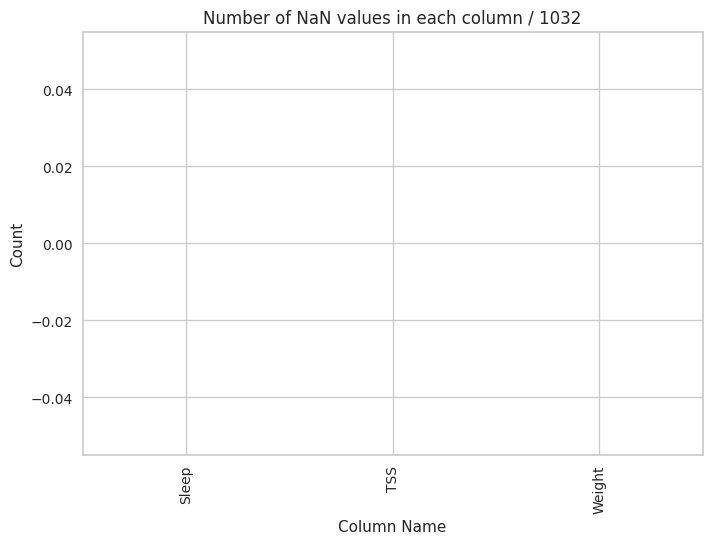

In [33]:
nan_counts = df3.isna().sum()


# Plotting the NaN counts
nan_counts.plot(kind='bar', color='skyblue')
plt.title(f'Number of NaN values in each column / {count_date}')
plt.ylabel('Count')
plt.xlabel('Column Name')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split


X3 = df3 
y3 = df['Cals']


X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3)

X_train3, y_train3


(     Sleep  TSS  Weight
 182    7.3   90    87.6
 480    6.5    0    85.4
 521    8.6   74    85.9
 500    7.1   67    85.4
 336    8.1   76    88.8
 ..     ...  ...     ...
 108    8.1   59    85.5
 278    6.9  268    89.9
 877    7.5   19    86.1
 446    6.7  140    82.5
 104    8.7    0    85.5
 
 [709 rows x 3 columns],
 182    2900.0
 480    1600.0
 521    3750.0
 500    3730.0
 336    3230.0
         ...  
 108    2730.0
 278    4960.0
 877    2700.0
 446    6050.0
 104    2280.0
 Name: Cals, Length: 709, dtype: float64)

In [35]:
numeric_cols = X_train3.select_dtypes(include=['float64', 'int64']).columns.tolist()




# Creating transformers
transformers = [
    ('robust', RobustScaler(), numeric_cols)]
    
    # Building the column transformer
preprocessor = ColumnTransformer(transformers)



X_train3_processed = pd.DataFrame(preprocessor.fit_transform(X_train3))

X_train3_processed

,0,1,2
0,-0.214286,1.00,0.026316
1,-0.785714,-2.60,-0.552632
2,0.714286,0.36,-0.421053
3,-0.357143,0.08,-0.552632
4,0.357143,0.44,0.342105
...,...,...,...
704,0.357143,-0.24,-0.526316
705,-0.500000,8.12,0.631579
706,-0.071429,-1.84,-0.368421
707,-0.642857,3.00,-1.315789


In [36]:
from sklearn.linear_model import LinearRegression


# Preprocess the test data
X_test3_processed = preprocessor.transform(X_test3)




# Instantiate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train3_processed, y_train3)

# Score the model on the Test data
#model.score(X_test,y_test)
# Score the model on the preprocessed test data
model.score(X_test3_processed, y_test3)

0.575220545364263

In [37]:
from sklearn.model_selection import cross_validate
# 5-Fold Cross validate model
model = LinearRegression()
cv_results3_train = cross_validate(model, X_train3_processed, y_train3, cv=5, 
                            scoring=['max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )
pd.DataFrame(cv_results3_train) # Cross validation output

,fit_time,score_time,test_max_error,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.003872,0.001102,-1422.158892,0.553304,-437.716453,-290486.724499
1,0.001513,0.001010,-2093.306670,0.372903,-453.475938,-345665.301729
2,0.001336,0.000814,-2333.166488,0.392098,-524.701950,-450761.653676
3,0.001045,0.000892,-1922.149126,0.395720,-498.997434,-370435.674686
4,0.001025,0.000790,-2392.450497,0.439840,-443.154385,-308879.238819


In [39]:
cv_results3_train['test_r2'].mean()

0.4307729946071242

In [40]:
from sklearn.model_selection import cross_validate
# 5-Fold Cross validate model
model = LinearRegression()
cv_results3_test = cross_validate(model, X_test3, y_test3, cv=5, 
                            scoring=['max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )
pd.DataFrame(cv_results3_test) # Cross validation output

,fit_time,score_time,test_max_error,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.004959,0.001743,-1324.603591,0.533174,-457.803042,-303500.402215
1,0.003016,0.002333,-1223.561510,0.581568,-386.424016,-262951.128631
2,0.003317,0.001763,-2096.852526,0.549969,-447.650962,-367081.483755
3,0.002418,0.001669,-1514.385063,0.634223,-475.872908,-332137.405354
4,0.002720,0.001965,-2402.796019,0.335688,-489.026194,-435469.277670


In [41]:
cv_results3_test['test_r2'].mean()

0.5269243124427463

In [139]:


new_data3 = {
       
    'Sleep' : 8.1,              
    'TSS' : 100,              
    'Weight' : 86.8,           
}

new_data_df3 = pd.DataFrame([new_data3])

# # Identify numeric and categorical columns
numeric_cols3 = new_data_df3.select_dtypes(include=['float64', 'int64']).columns.tolist()



transformers3 = [
    ('robust', RobustScaler(), numeric_cols3)]


# # Building the column transformer
preprocessor3 = ColumnTransformer(transformers3)



X_train3_processed = pd.DataFrame(preprocessor3.fit_transform(new_data_df3))



X_new_data3 = preprocessor.transform(X_train3_processed)


#X_new_data3 = preprocessor.transform(new_data_df3)
print(X_new_data3.shape)

model = LinearRegression()

pred_new_data3 = model.predict(X_new_data3)
pred_new_data3


KeyError: "None of [Index(['Sleep', 'Activity Duration', 'TSS', 'Weight', 'Steps', 'Cals_burnt',\n       'Protein', 'Sensation'],\n      dtype='object')] are in the [columns]"